# Task 2 – Regression using PyTorch (35%)

# Task2 (Part 1): Using PyTorch and its Autograd feature

In [1]:
import torch

In [2]:
# Initialize variables x and c as scalar tensors with a single value = 1
x = torch.tensor(1.0, requires_grad=True)
c = torch.tensor(1.0, requires_grad=False)  # c is a constant

# Function definitions
def q1(x, c):
    t = 2*x + c
    y = 3*(t**2 + 2)**2
    return y

def q2(x, c):
    s = 2*x
    y = 3*(s**3 + s) + 2*c**4
    return y

def q3(x, c):
    q = 2*x + c
    r = 2*q + 3
    p = 2*r**3 + 3*r
    t = (p**2 + 2*p + 3)**2 
    y = 2*t + c
    return y

# Calculate dy/dx using PyTorch's Autograd
dy_dx_q1 = torch.autograd.grad(q1(x, c), x)[0]
dy_dx_q2 = torch.autograd.grad(q2(x, c), x)[0]
dy_dx_q3 = torch.autograd.grad(q3(x, c), x)[0]

# Print the results
print("Q1: dy/dx =", dy_dx_q1.item())
print("Q2: dy/dx =", dy_dx_q2.item())
print("Q3: dy/dx =", dy_dx_q3.item())


Q1: dy/dx = 792.0
Q2: dy/dx = 78.0
Q3: dy/dx = 51347072221184.0


Result Interpretation: The result dy/dx = 792.0 implies that the rate of change of y with respect to x when x=1 and c=1 for the given function q1(x,c) is 792.0.
The output dy/dx = 78.0 indicates the rate of change of y concerning x at x=1 and c=1 for the given function q2(x,c) is 78.0.

# 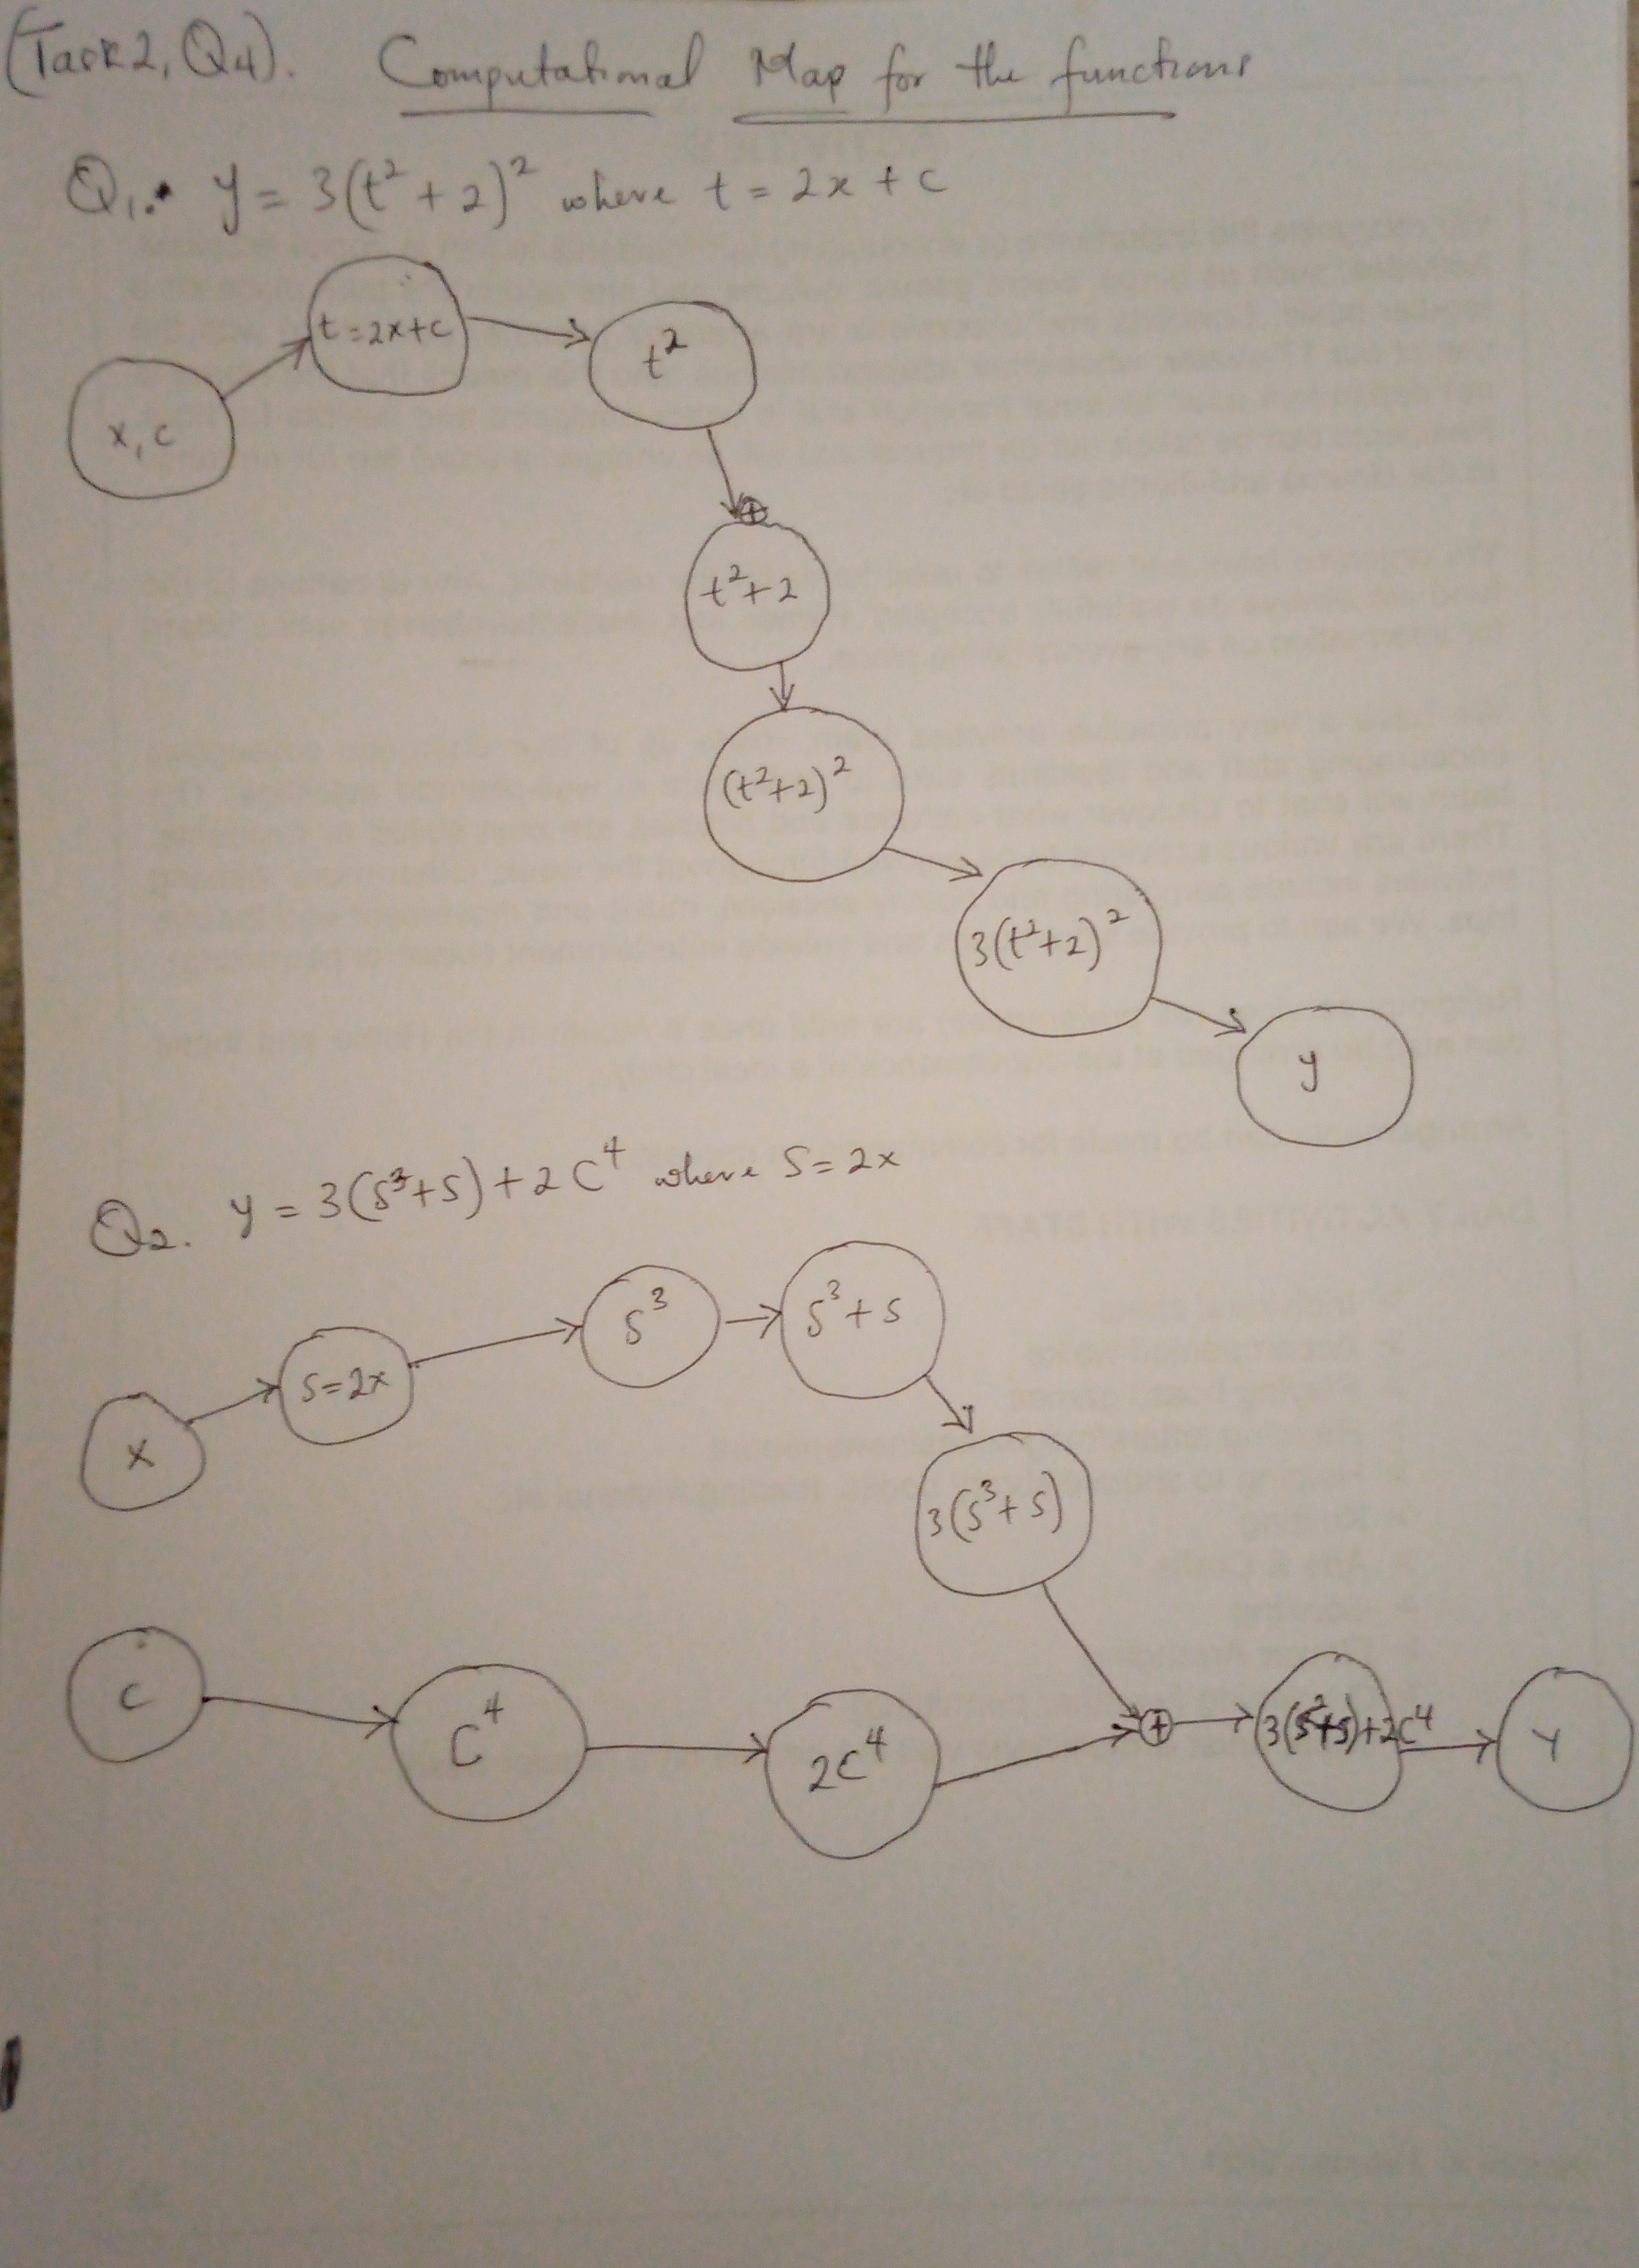

# Task 2(Part 2): Using PyTorch without helper functions (without using torch.nn or torch.optim)

Below is the step-by-step approach initiated to this task:

Initialize the parameters 
a and b with random values.
Define the model function f(x) as given.
Define the mean squared error (MSE) loss function.
Implement the gradient descent algorithm to minimize the loss function.
Iterate through the dataset and update the parameters using gradients.
Repeat the process until convergence or a specified number of iterations.
Finally, I output the optimized values of a and b.
In addition, the mean squared error between the model's predictions and the actual data was calculated and visualize the fit of the model by plotting both the actual data points and the model's predictions.

In [8]:
import torch

# Define the data
X = torch.tensor([-2, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1,
                  -1, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0,
                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1,
                   1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0], dtype=torch.float32)
y0 = torch.tensor([6.255, 6.121, 6.005, 5.907, 5.825, 5.758, 5.704, 5.664, 5.636, 5.62,
                   5.614, 5.618, 5.631, 5.652, 5.682, 5.719, 5.763, 5.814, 5.87, 5.933,
                   6.0, 6.072, 6.149, 6.231, 6.316, 6.405, 6.497, 6.593, 6.691, 6.793,
                   6.897, 7.003, 7.112, 7.223, 7.335, 7.45, 7.566, 7.684, 7.804, 7.924], dtype=torch.float32)

# Initialize parameters a and b
a = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Perform gradient descent
for i in range(num_iterations):
    # Forward pass
    y_pred = torch.exp(-a * X) + 2 * a * X + b
    
    # Compute the loss (mean squared error)
    loss = torch.mean((y_pred - y0)**2)
    
    # Backward pass
    loss.backward()
    
    # Update parameters using gradient descent
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        
        # Manually zero the gradients after updating
        a.grad = None
        b.grad = None

# Print the optimized parameters
print("Optimized values:")
print("a =", a.item())
print("b =", b.item())

Optimized values:
a = 0.6886922121047974
b = 4.952817916870117


Optimized values:
a = 0.6886922121047974
b = 4.952817916870117
Mean Squared Error: 0.3763105571269989


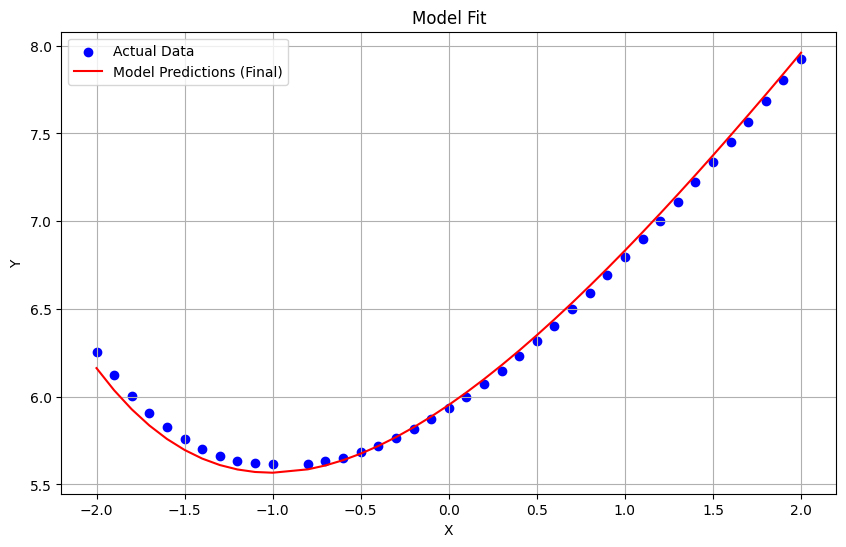

In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Define the data
X = torch.tensor([-2, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1,
                  -1, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0,
                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1,
                   1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0], dtype=torch.float32)
y0 = torch.tensor([6.255, 6.121, 6.005, 5.907, 5.825, 5.758, 5.704, 5.664, 5.636, 5.62,
                   5.614, 5.618, 5.631, 5.652, 5.682, 5.719, 5.763, 5.814, 5.87, 5.933,
                   6.0, 6.072, 6.149, 6.231, 6.316, 6.405, 6.497, 6.593, 6.691, 6.793,
                   6.897, 7.003, 7.112, 7.223, 7.335, 7.45, 7.566, 7.684, 7.804, 7.924], dtype=torch.float32)

# Initialize parameters a and b
a = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Lists to store the model's predictions and the actual y values
predictions = []

# Perform gradient descent
for i in range(num_iterations):
    # Forward pass
    y_pred = torch.exp(-a * X) + 2 * a * X + b
    
    # Compute the loss (mean squared error)
    loss = torch.mean((y_pred - y0)**2)
    
    # Backward pass
    loss.backward()
    
    # Update parameters using gradient descent
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        
        # Manually zero the gradients after updating
        a.grad = None
        b.grad = None
    
    # Append the predictions to the list
    predictions.append(y_pred.detach().unsqueeze(1))

# Print the optimized parameters
print("Optimized values:")
print("a =", a.item())
print("b =", b.item())

# Concatenate the predictions along dimension 1
predictions = torch.cat(predictions, dim=1)

# Calculate the mean squared error
mse = ((predictions - y0.unsqueeze(1))**2).mean()

print("Mean Squared Error:", mse.item())

# Plot the data and the model's predictions
plt.figure(figsize=(10, 6))
plt.scatter(X, y0, color='blue', label='Actual Data')
plt.plot(X, predictions[:, -1].detach().numpy(), color='red', label='Model Predictions (Final)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Model Fit')
plt.legend()
plt.grid(True)
plt.show()

After executing the code, the optimized values for the parameters a and b are approximately a=0.6887 and b=4.9528, respectively. These values are obtained through gradient descent optimization, which iteratively updates the parameters to minimize the mean squared error between the model's predictions and the actual data.

The mean squared error (MSE) between the model's predictions and the actual data is calculated to be approximately 0.3763. The MSE provides a measure of the average squared difference between the predicted values and the actual values. A lower MSE indicates a better fit of the model to the data.

Furthermore, the fit of the model is visualized by plotting both the actual data points and the model's predictions. The plot shows how well the model captures the trend of the data.

Overall, the optimized parameters and the MSE provide insights into how well the model performs in approximating the relationship between the input variable X and the output variable 
y0.

References:

https://www.youtube.com/watch?v=hCP1vGoCdYU : Computational Graph

https://www.youtube.com/watch?v=FbxTVRfQFuI : Introduction to Deep Learning

Goodfellow, Ian, et al. "Deep Learning." MIT Press, 2016.

Ruder, Sebastian. "An overview of gradient descent optimization algorithms." arXiv preprint arXiv:1609.04747 (2016).

Zhang, Chiyuan, et al. "Understanding deep learning requires rethinking generalization." arXiv preprint arXiv:1611.03530 (2016).